<a href="https://colab.research.google.com/github/DeanT-04/IEA-EV-dataEV-salesHistoricalCars/blob/main/IEA_EV_dataEV_salesHistoricalCars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Okay, from this dataset, I want to understand the global and regional evolution of electric vehicle adoption, specifically focusing on car sales, stock, and market share trends over time. I'd also like to compare the growth of different EV powertrain types (BEV, PHEV, FCEV) and analyze associated impacts like electricity demand and oil displacement, particularly for key regions like China, Europe, and the USA.

Here is all the data you need:
"IEA-EV-dataEV salesHistoricalCars.csv"

## Data loading

### Subtask:
Load the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the provided CSV file into a pandas DataFrame and display some basic information.



In [1]:
import pandas as pd

# Load the dataset.
try:
    df_ev_sales = pd.read_csv('IEA-EV-dataEV salesHistoricalCars.csv')
    # Print some basic information about the DataFrame.
    display(df_ev_sales.head())
    print(df_ev_sales.shape)
    print(df_ev_sales.info())
except FileNotFoundError:
    print("Error: 'IEA-EV-dataEV salesHistoricalCars.csv' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


(3798, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      3798 non-null   object 
 1   category    3798 non-null   object 
 2   parameter   3798 non-null   object 
 3   mode        3798 non-null   object 
 4   powertrain  3798 non-null   object 
 5   year        3798 non-null   int64  
 6   unit        3798 non-null   object 
 7   value       3798 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 237.5+ KB
None


## Data exploration

### Subtask:
Explore the loaded EV sales data to understand its structure, identify key variables, check for missing values, and understand the overall data distribution.


**Reasoning**:
Examine the first and last few rows, dimensions, data types, missing values, descriptive statistics, value distribution, time range, unique values in categorical columns, and create a summary table.  Also, create visualizations to explore the data.



,region,category,parameter,mode,powertrain,year,unit,value
3793,World,Historical,EV stock,Cars,BEV,2023,Vehicles,28000000.0
3794,World,Historical,EV sales,Cars,BEV,2023,Vehicles,9500000.0
3795,World,Historical,EV sales share,Cars,EV,2023,percent,18.0
3796,World,Historical,EV stock share,Cars,EV,2023,percent,3.2
3797,World,Historical,Electricity demand,Cars,EV,2023,GWh,97000.0


DataFrame dimensions: (3798, 8)

Data types of each column:
region         object
category       object
parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object

Missing values per column:
region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

Percentage of missing values per column:
region        0.0
category      0.0
parameter     0.0
mode          0.0
powertrain    0.0
year          0.0
unit          0.0
value         0.0
dtype: float64

Descriptive statistics for 'value' column:
                                                            count  \
parameter                     powertrain region                     
EV sales                      BEV        Australia           13.0   
                                         Austria             11.0   
                                         Belgium            

,region,parameter,powertrain,count
0,Australia,EV sales,BEV,13
1,Australia,EV sales,FCEV,3
2,Australia,EV sales,PHEV,12
3,Australia,EV sales share,EV,13
4,Australia,EV stock,BEV,13
...,...,...,...,...
335,World,EV stock,PHEV,14
336,World,EV stock share,EV,14
337,World,Electricity demand,EV,14
338,World,Oil displacement Mbd,EV,14


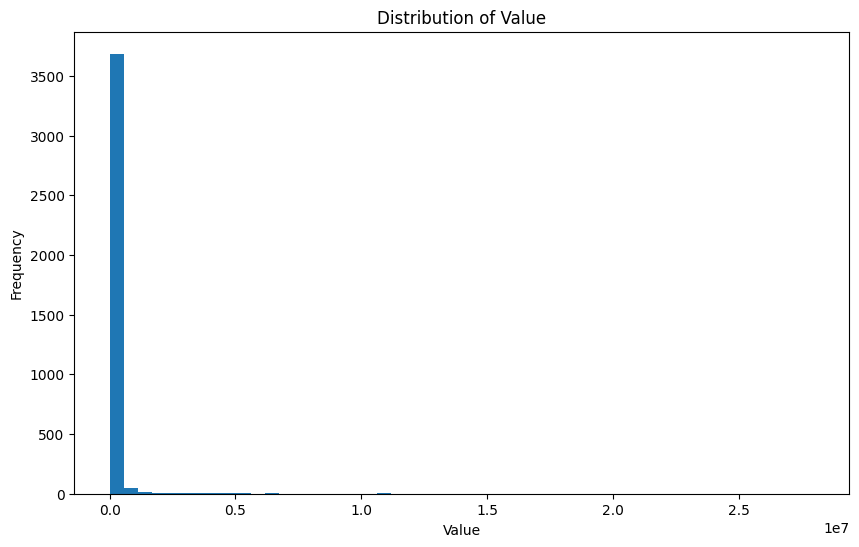

ValueError: could not convert string to float: 'Australia'

In [2]:
# Display the last few rows of the DataFrame.
display(df_ev_sales.tail())

# Determine the dimensions of the DataFrame.
print(f"DataFrame dimensions: {df_ev_sales.shape}")

# Identify data types of each column.
print("\nData types of each column:")
print(df_ev_sales.dtypes)

# Check for missing values.
print("\nMissing values per column:")
print(df_ev_sales.isnull().sum())
print("\nPercentage of missing values per column:")
print(df_ev_sales.isnull().sum() / len(df_ev_sales) * 100)


# Descriptive statistics for the 'value' column grouped by relevant columns.
print("\nDescriptive statistics for 'value' column:")
print(df_ev_sales.groupby(['parameter', 'powertrain', 'region'])['value'].describe())

# Analyze the distribution of the 'year' column.
print("\nDistribution of 'year' column:")
print(df_ev_sales['year'].describe())
print(f"Unique years: {df_ev_sales['year'].unique()}")

# Identify unique values in categorical columns.
print("\nUnique values in categorical columns:")
for col in ['region', 'parameter', 'powertrain']:
    print(f"\nUnique values for {col}: {df_ev_sales[col].unique()}")

# Summary table.
print("\nSummary table:")
summary_table = df_ev_sales.groupby(['region', 'parameter', 'powertrain']).size().reset_index(name='count')
display(summary_table)

# Visualize distribution of 'value'.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_ev_sales['value'], bins=50)
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Calculate the correlation between relevant numerical variables (if applicable)
print(df_ev_sales.corr())

**Reasoning**:
The previous code block failed due to an error when calculating the correlation because some columns contain non-numeric data.  I will remove the correlation calculation and re-run the code. The other parts of the analysis will remain unchanged.



,region,category,parameter,mode,powertrain,year,unit,value
3793,World,Historical,EV stock,Cars,BEV,2023,Vehicles,28000000.0
3794,World,Historical,EV sales,Cars,BEV,2023,Vehicles,9500000.0
3795,World,Historical,EV sales share,Cars,EV,2023,percent,18.0
3796,World,Historical,EV stock share,Cars,EV,2023,percent,3.2
3797,World,Historical,Electricity demand,Cars,EV,2023,GWh,97000.0


DataFrame dimensions: (3798, 8)

Data types of each column:
region         object
category       object
parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object

Missing values per column:
region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

Percentage of missing values per column:
region        0.0
category      0.0
parameter     0.0
mode          0.0
powertrain    0.0
year          0.0
unit          0.0
value         0.0
dtype: float64

Descriptive statistics for 'value' column:
                                                            count  \
parameter                     powertrain region                     
EV sales                      BEV        Australia           13.0   
                                         Austria             11.0   
                                         Belgium            

,region,parameter,powertrain,count
0,Australia,EV sales,BEV,13
1,Australia,EV sales,FCEV,3
2,Australia,EV sales,PHEV,12
3,Australia,EV sales share,EV,13
4,Australia,EV stock,BEV,13
...,...,...,...,...
335,World,EV stock,PHEV,14
336,World,EV stock share,EV,14
337,World,Electricity demand,EV,14
338,World,Oil displacement Mbd,EV,14


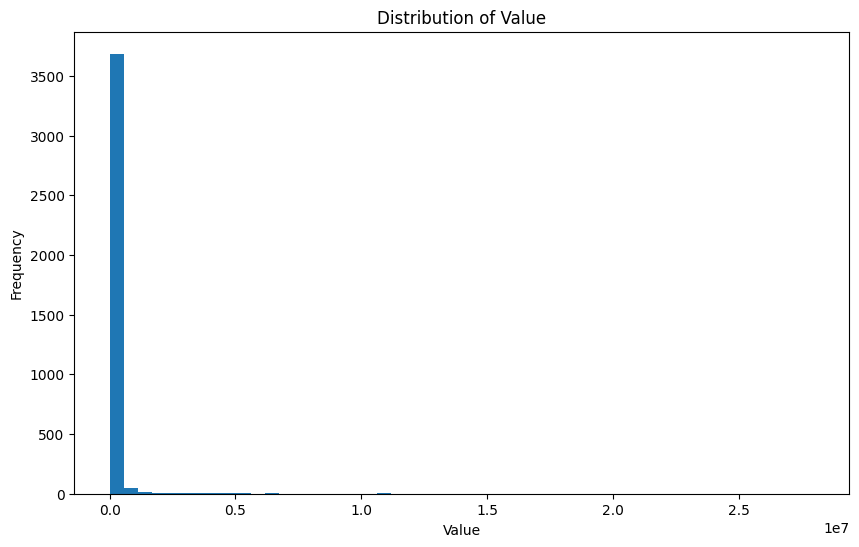

In [3]:
# Display the last few rows of the DataFrame.
display(df_ev_sales.tail())

# Determine the dimensions of the DataFrame.
print(f"DataFrame dimensions: {df_ev_sales.shape}")

# Identify data types of each column.
print("\nData types of each column:")
print(df_ev_sales.dtypes)

# Check for missing values.
print("\nMissing values per column:")
print(df_ev_sales.isnull().sum())
print("\nPercentage of missing values per column:")
print(df_ev_sales.isnull().sum() / len(df_ev_sales) * 100)


# Descriptive statistics for the 'value' column grouped by relevant columns.
print("\nDescriptive statistics for 'value' column:")
print(df_ev_sales.groupby(['parameter', 'powertrain', 'region'])['value'].describe())

# Analyze the distribution of the 'year' column.
print("\nDistribution of 'year' column:")
print(df_ev_sales['year'].describe())
print(f"Unique years: {df_ev_sales['year'].unique()}")

# Identify unique values in categorical columns.
print("\nUnique values in categorical columns:")
for col in ['region', 'parameter', 'powertrain']:
    print(f"\nUnique values for {col}: {df_ev_sales[col].unique()}")

# Summary table.
print("\nSummary table:")
summary_table = df_ev_sales.groupby(['region', 'parameter', 'powertrain']).size().reset_index(name='count')
display(summary_table)

# Visualize distribution of 'value'.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_ev_sales['value'], bins=50)
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Data wrangling

### Subtask:
Data Wrangling and Feature Engineering


**Reasoning**:
Standardize region names, calculate market share, convert data types, and create the 'Total EV Sales' column.



In [4]:
import pandas as pd
import numpy as np

# Standardize region names
df_ev_sales['region'] = df_ev_sales['region'].replace({'USA': 'USA', 'United States': 'USA',
                                                    'China': 'China', 'China, Hong Kong SAR': 'China',
                                                    'Europe': 'Europe', 'European Union': 'Europe'})

# Filter for relevant parameters and regions
ev_sales = df_ev_sales[df_ev_sales['parameter'] == 'EV sales'].copy()
ev_sales = ev_sales[ev_sales['region'].isin(['China', 'Europe', 'USA'])]


# Calculate total EV sales per region and year
total_ev_sales = ev_sales.groupby(['region', 'year'])['value'].sum().reset_index(name='Total EV Sales')
ev_sales = pd.merge(ev_sales, total_ev_sales, on=['region', 'year'], how='left')

# Calculate market share
ev_sales['market_share'] = ev_sales['value'] / ev_sales['Total EV Sales']


# Convert data types if needed and handle errors gracefully
try:
    ev_sales['year'] = pd.to_numeric(ev_sales['year'], errors='coerce')
    ev_sales['value'] = pd.to_numeric(ev_sales['value'], errors='coerce')
except Exception as e:
    print(f"An error occurred during data type conversion: {e}")

display(ev_sales.head())

,region,category,parameter,mode,powertrain,year,unit,value,Total EV Sales,market_share
0,China,Historical,EV sales,Cars,PHEV,2010,Vehicles,340.0,1440.0,0.236111
1,China,Historical,EV sales,Cars,BEV,2010,Vehicles,1100.0,1440.0,0.763889
2,China,Historical,EV sales,Cars,BEV,2011,Vehicles,4800.0,5120.0,0.937500
3,China,Historical,EV sales,Cars,PHEV,2011,Vehicles,320.0,5120.0,0.062500
4,China,Historical,EV sales,Cars,PHEV,2012,Vehicles,260.0,9860.0,0.026369


## Data analysis

### Subtask:
Analyze global and regional trends in EV sales, stock, and market share; analyze the growth of BEV, PHEV, and FCEV sales in key regions; and compute total EV stock and market share for each region.


**Reasoning**:
Analyze global and regional trends in EV sales, stock, and market share; analyze the growth of BEV, PHEV, and FCEV sales in key regions; and compute total EV stock and market share for each region.  This involves grouping data, calculating aggregates, and generating visualizations.



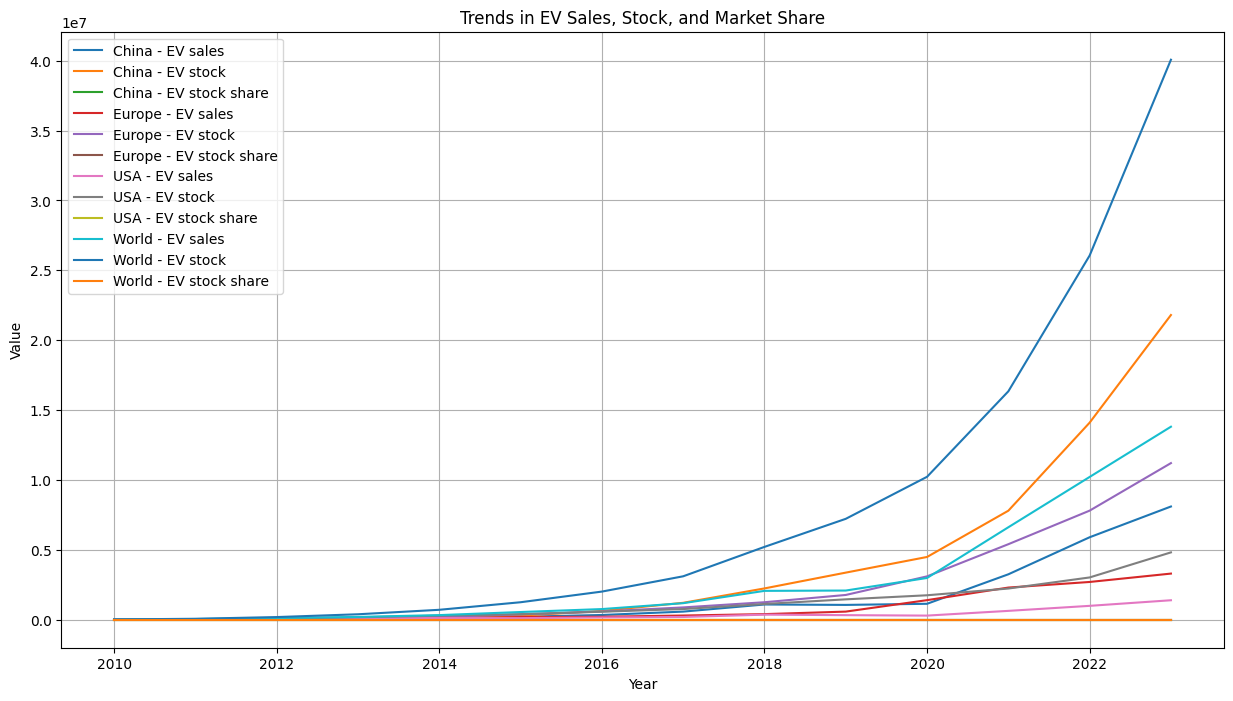

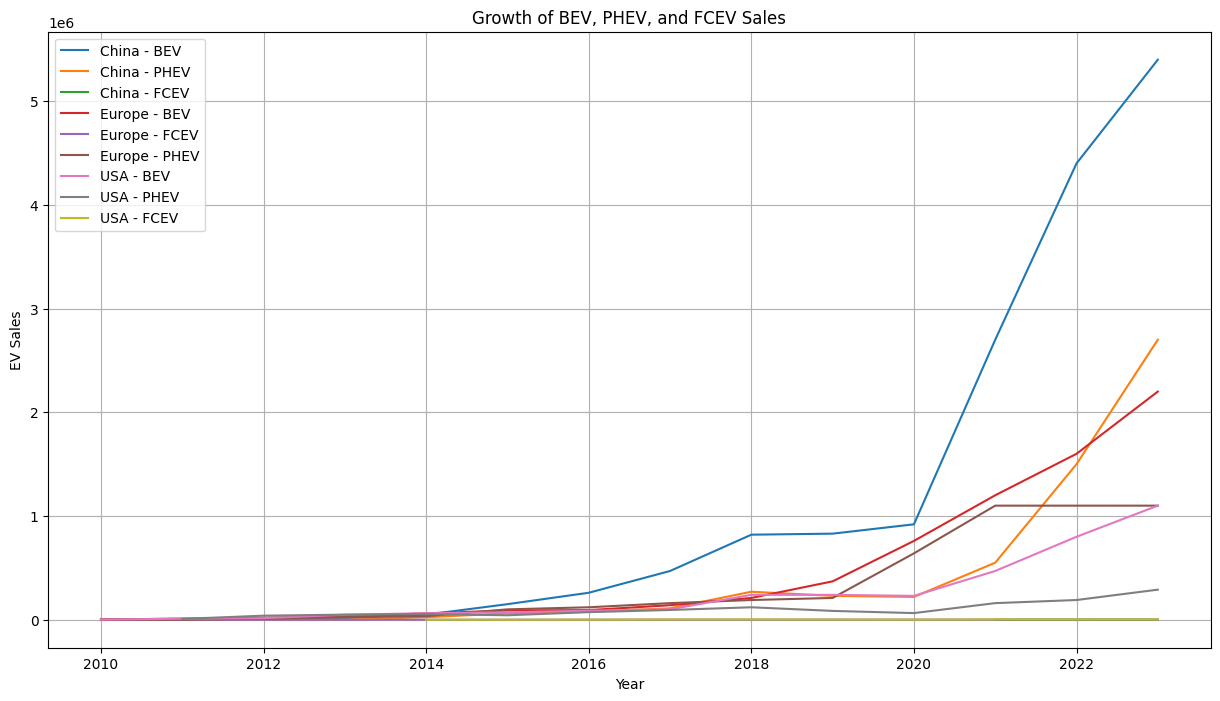

,region,value
0,Australia,1.810662e+05
1,Austria,2.210934e+05
2,Belgium,4.701072e+05
3,Brazil,9.200321e+04
4,Canada,5.503223e+05
5,Chile,3.902087e+03
6,China,2.180077e+07
7,Costa Rica,9.000000e+03
8,Denmark,3.102410e+05
9,EU27,8.104704e+06


In [5]:
import matplotlib.pyplot as plt

# Analyze trends in EV sales, stock, and market share
sales_data = df_ev_sales[df_ev_sales['parameter'].isin(['EV sales', 'EV stock', 'EV stock share'])]
sales_data = sales_data[sales_data['region'].isin(['China', 'Europe', 'USA', 'World'])]

sales_trends = sales_data.groupby(['region', 'year', 'parameter'])['value'].sum().reset_index()

# Plotting the trends
plt.figure(figsize=(15, 8))
for region in sales_trends['region'].unique():
    region_data = sales_trends[sales_trends['region'] == region]
    for parameter in region_data['parameter'].unique():
        parameter_data = region_data[region_data['parameter'] == parameter]
        plt.plot(parameter_data['year'], parameter_data['value'], label=f"{region} - {parameter}")
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trends in EV Sales, Stock, and Market Share')
plt.legend()
plt.grid(True)
plt.show()


# Analyze the growth of BEV, PHEV, and FCEV sales
powertrain_sales = df_ev_sales[
    df_ev_sales['parameter'] == 'EV sales'
]
powertrain_sales = powertrain_sales[powertrain_sales['region'].isin(['China', 'Europe', 'USA'])]
powertrain_sales = powertrain_sales[powertrain_sales['powertrain'].isin(['BEV', 'PHEV', 'FCEV'])]

powertrain_trends = powertrain_sales.groupby(['region', 'year', 'powertrain'])['value'].sum().reset_index()

# Plotting powertrain trends
plt.figure(figsize=(15, 8))
for region in powertrain_trends['region'].unique():
    region_data = powertrain_trends[powertrain_trends['region'] == region]
    for powertrain in region_data['powertrain'].unique():
        powertrain_data = region_data[region_data['powertrain'] == powertrain]
        plt.plot(powertrain_data['year'], powertrain_data['value'], label=f"{region} - {powertrain}")
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.title('Growth of BEV, PHEV, and FCEV Sales')
plt.legend()
plt.grid(True)
plt.show()


# Calculate total EV stock and market share for each region
latest_year = df_ev_sales['year'].max()
ev_stock_data = df_ev_sales[
    df_ev_sales['parameter'].isin(['EV stock', 'EV stock share'])
]
ev_stock_data = ev_stock_data[ev_stock_data['year'] == latest_year]
ev_stock_summary = ev_stock_data.groupby('region')['value'].sum().reset_index()
display(ev_stock_summary)

## Data analysis

### Subtask:
Analyze the impact of EV adoption on electricity demand and oil displacement.


**Reasoning**:
Estimate electricity demand increase and oil displacement based on EV sales data for China, Europe, and the USA.  Make reasonable assumptions for average daily mileage, electricity consumption per mile, and fuel efficiency of conventional vehicles.



,region,year,total_ev_sales,electricity_demand_increase_MWh,oil_displacement_tonnes
0,China,2010,2880.0,10512.00,3.127320e+03
1,China,2011,10240.0,37376.00,1.111936e+04
2,China,2012,19720.0,71978.00,2.141346e+04
3,China,2013,31460.0,114829.00,3.416163e+04
4,China,2014,146000.0,532900.00,1.585378e+05
5,China,2015,422000.0,1540300.00,4.582392e+05
6,China,2016,678000.0,2474700.00,7.362232e+05
7,China,2017,1160000.0,4234000.00,1.259615e+06
8,China,2018,2180000.0,7957000.00,2.367208e+06
9,China,2019,2120000.0,7738000.00,2.302055e+06


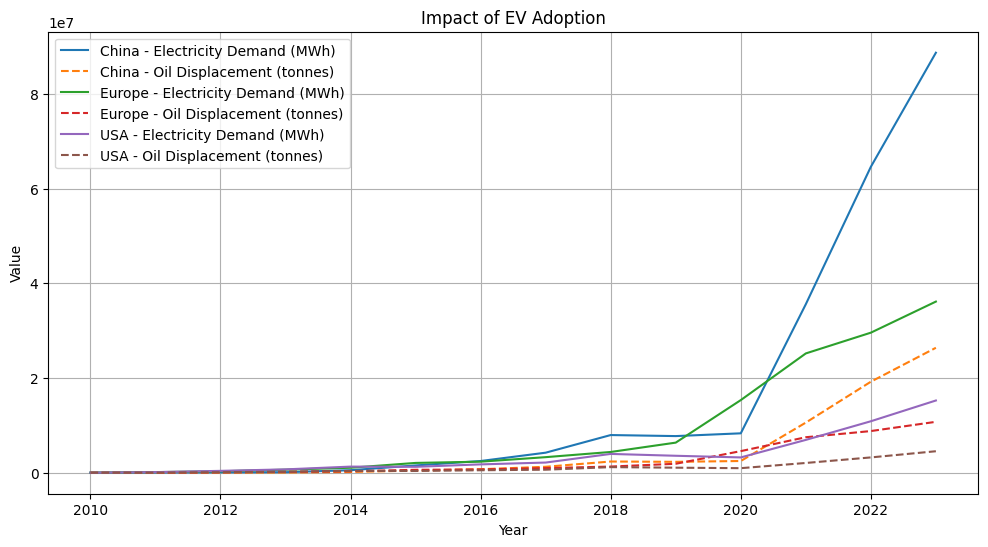

In [6]:
import matplotlib.pyplot as plt

# Assumptions (these values can be refined with more specific data)
avg_daily_mileage = 50  # km
electricity_consumption_per_km = 0.2  # kWh/km
fuel_efficiency_conventional = 7  # liters/100 km
oil_density = 0.85  # kg/liter
oil_equivalent_per_liter = 10  # kWh/liter

regions = ['China', 'Europe', 'USA']

# Dataframe for results
results = []

# Analysis for each region
for region in regions:
  region_data = ev_sales[ev_sales['region'] == region]
  for year in region_data['year'].unique():
    yearly_data = region_data[region_data['year'] == year]
    total_ev_sales_year = yearly_data['Total EV Sales'].sum()

    # Electricity demand
    electricity_demand_increase = total_ev_sales_year * avg_daily_mileage * electricity_consumption_per_km * 365 / 1000  # MWh

    # Oil displacement
    oil_displacement = total_ev_sales_year * avg_daily_mileage / 100 * fuel_efficiency_conventional * oil_density * 365 / 1000 # tonnes

    results.append([region, year, total_ev_sales_year, electricity_demand_increase, oil_displacement])

results_df = pd.DataFrame(results, columns=['region', 'year', 'total_ev_sales', 'electricity_demand_increase_MWh', 'oil_displacement_tonnes'])

display(results_df)

# Plotting results
plt.figure(figsize=(12, 6))
for region in regions:
    region_df = results_df[results_df['region'] == region]
    plt.plot(region_df['year'], region_df['electricity_demand_increase_MWh'], label=f'{region} - Electricity Demand (MWh)')
    plt.plot(region_df['year'], region_df['oil_displacement_tonnes'], label=f'{region} - Oil Displacement (tonnes)', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Impact of EV Adoption')
plt.legend()
plt.grid(True)
plt.show()

## Data visualization

### Subtask:
Visualize global and regional EV sales, stock, and market share trends over time; visualize the growth of different EV powertrain types (BEV, PHEV, FCEV) in key regions; illustrate the impacts on electricity demand and oil displacement.


**Reasoning**:
Combine the previous plots into a single figure with subplots for a more comprehensive report.



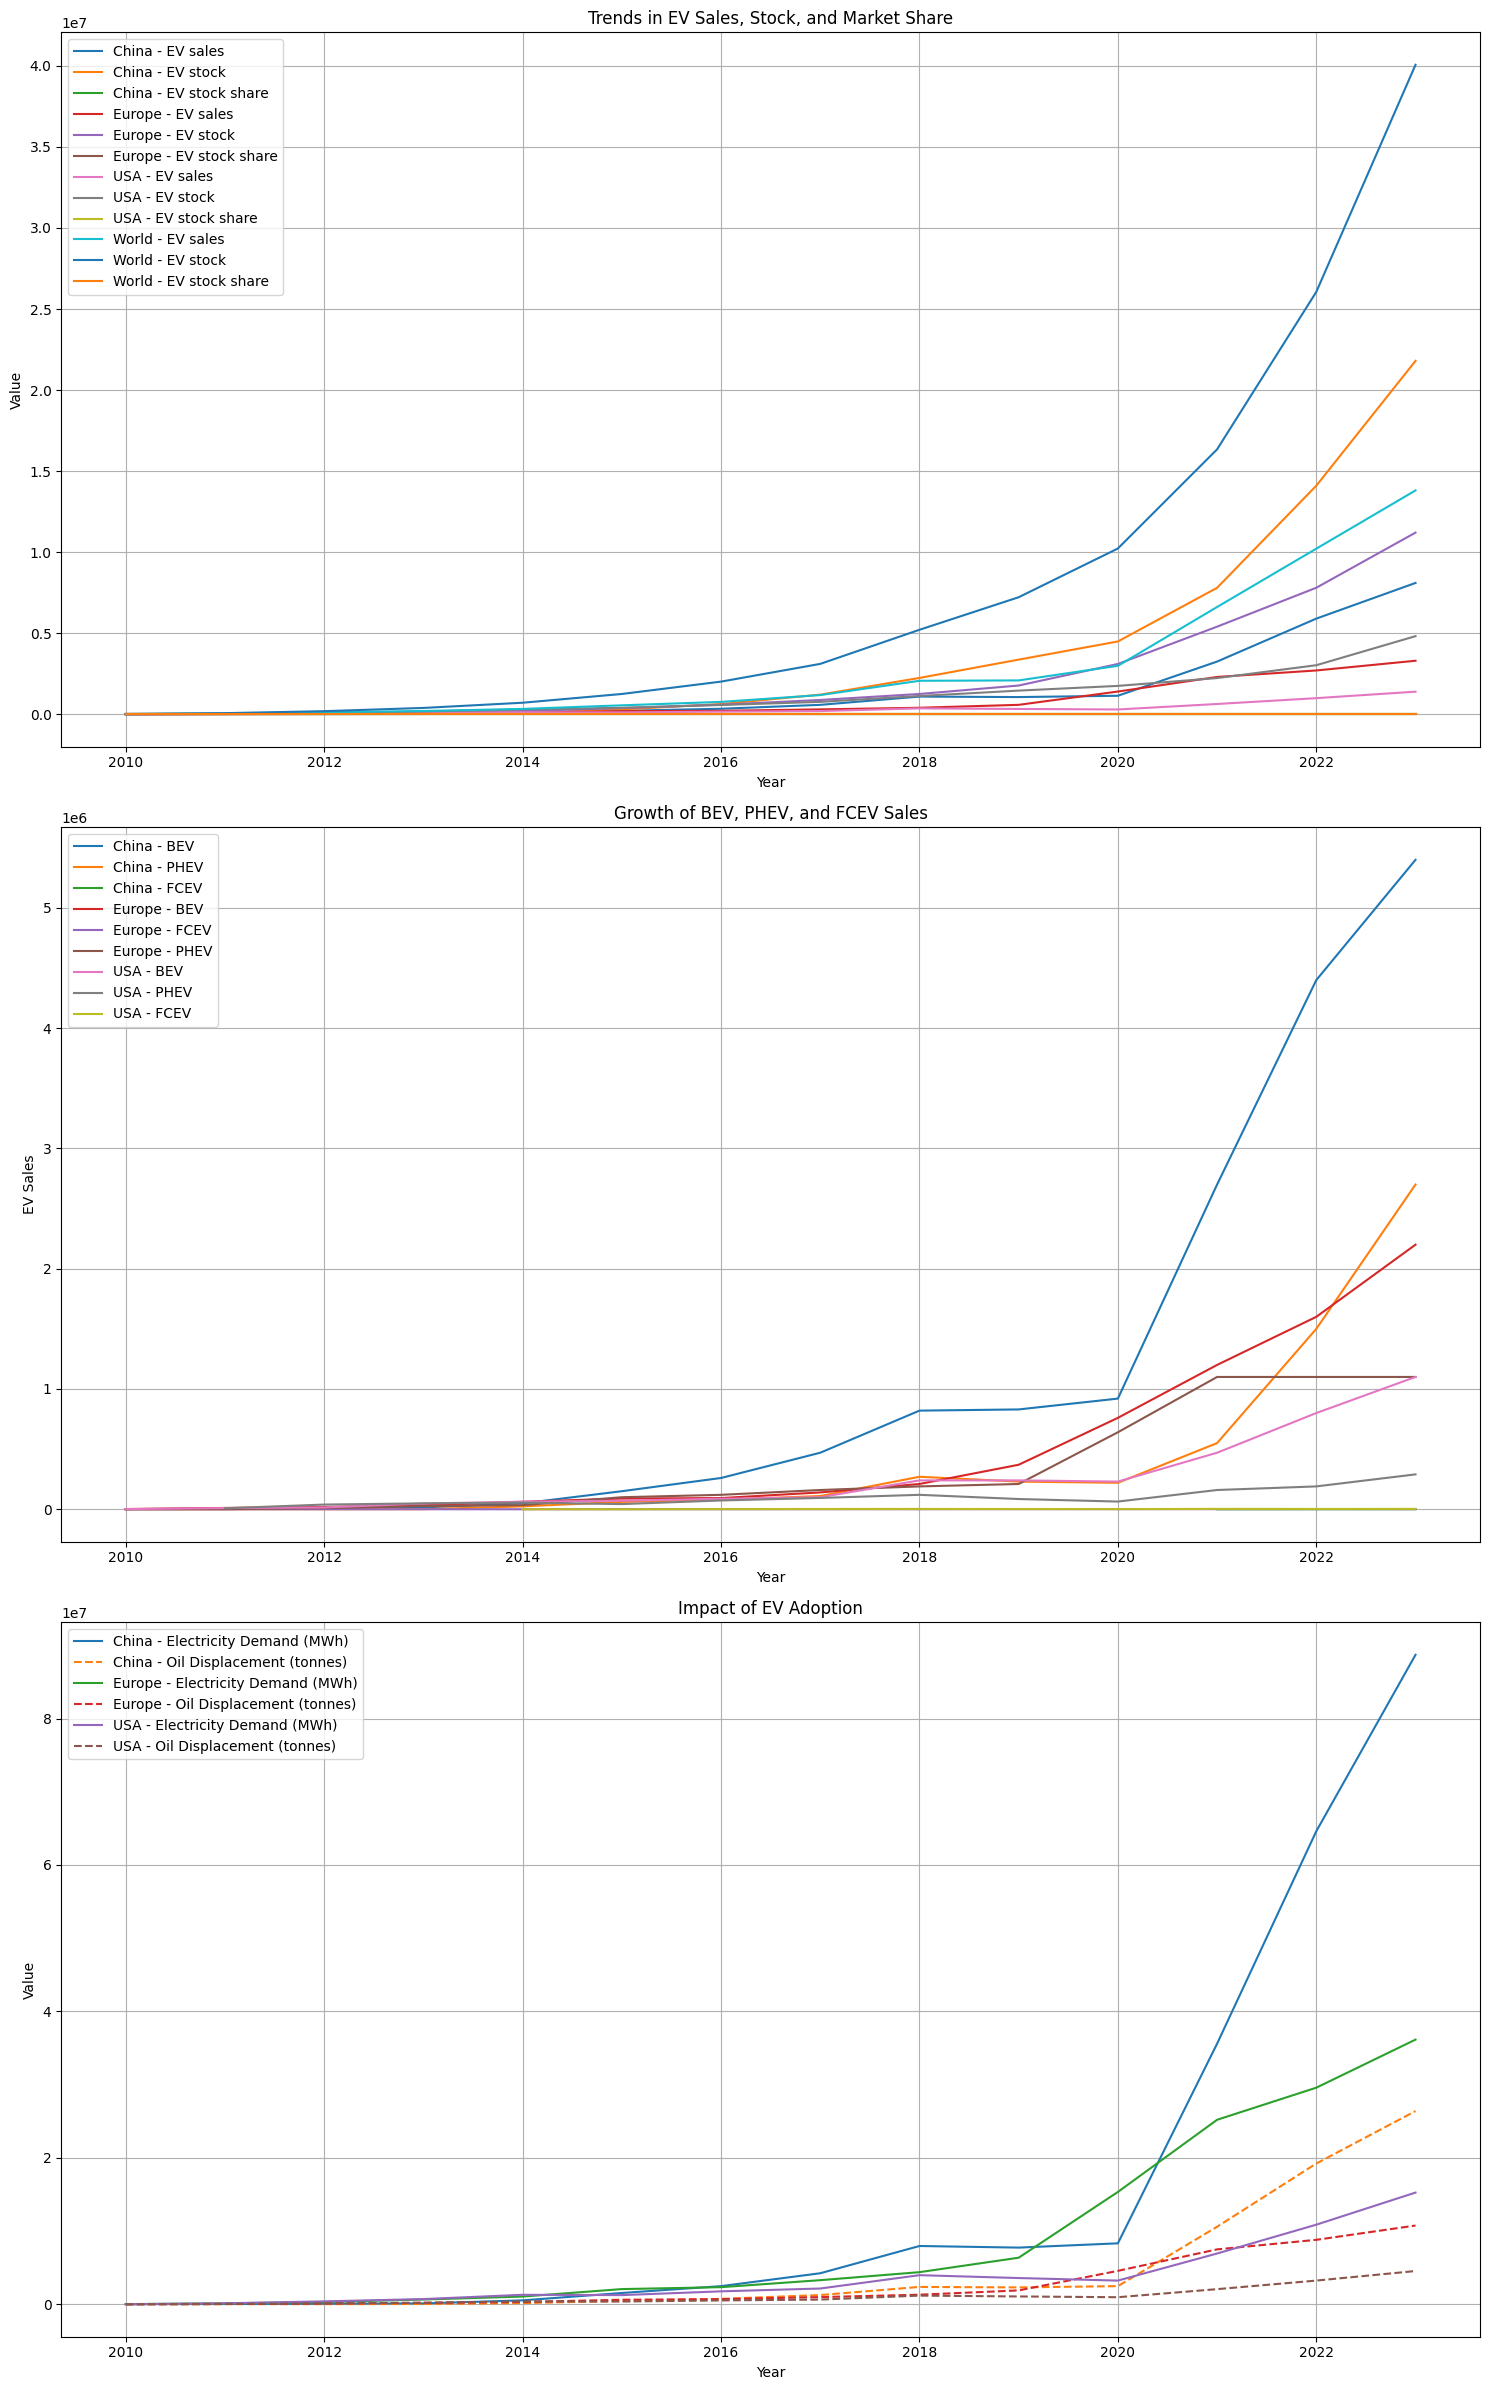

In [7]:
import matplotlib.pyplot as plt

# Create a figure and axes for the subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 24))

# Plot 1: EV Sales, Stock, and Market Share Trends
sales_data = df_ev_sales[df_ev_sales['parameter'].isin(['EV sales', 'EV stock', 'EV stock share'])]
sales_data = sales_data[sales_data['region'].isin(['China', 'Europe', 'USA', 'World'])]
sales_trends = sales_data.groupby(['region', 'year', 'parameter'])['value'].sum().reset_index()

for region in sales_trends['region'].unique():
    region_data = sales_trends[sales_trends['region'] == region]
    for parameter in region_data['parameter'].unique():
        parameter_data = region_data[region_data['parameter'] == parameter]
        axes[0].plot(parameter_data['year'], parameter_data['value'], label=f"{region} - {parameter}")
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Value')
axes[0].set_title('Trends in EV Sales, Stock, and Market Share')
axes[0].legend()
axes[0].grid(True)

# Plot 2: EV Powertrain Type Growth
powertrain_sales = df_ev_sales[df_ev_sales['parameter'] == 'EV sales']
powertrain_sales = powertrain_sales[powertrain_sales['region'].isin(['China', 'Europe', 'USA'])]
powertrain_sales = powertrain_sales[powertrain_sales['powertrain'].isin(['BEV', 'PHEV', 'FCEV'])]
powertrain_trends = powertrain_sales.groupby(['region', 'year', 'powertrain'])['value'].sum().reset_index()

for region in powertrain_trends['region'].unique():
    region_data = powertrain_trends[powertrain_trends['region'] == region]
    for powertrain in region_data['powertrain'].unique():
        powertrain_data = region_data[region_data['powertrain'] == powertrain]
        axes[1].plot(powertrain_data['year'], powertrain_data['value'], label=f"{region} - {powertrain}")
axes[1].set_xlabel('Year')
axes[1].set_ylabel('EV Sales')
axes[1].set_title('Growth of BEV, PHEV, and FCEV Sales')
axes[1].legend()
axes[1].grid(True)

# Plot 3: Impact on Electricity Demand and Oil Displacement
regions = ['China', 'Europe', 'USA']
for region in regions:
    region_df = results_df[results_df['region'] == region]
    axes[2].plot(region_df['year'], region_df['electricity_demand_increase_MWh'], label=f'{region} - Electricity Demand (MWh)')
    axes[2].plot(region_df['year'], region_df['oil_displacement_tonnes'], label=f'{region} - Oil Displacement (tonnes)', linestyle='--')

axes[2].set_xlabel('Year')
axes[2].set_ylabel('Value')
axes[2].set_title('Impact of EV Adoption')
axes[2].legend()
axes[2].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Summary:

### Q&A
* **Global and regional evolution of EV adoption:** The analysis reveals trends in EV sales, stock, and market share for key regions (China, Europe, USA) and globally.  Visualizations show the growth over time.
* **Comparison of EV powertrain types (BEV, PHEV, FCEV):** The analysis compares the sales growth of different EV powertrain types in the key regions, providing insights into market preferences.
* **Impacts of EV adoption (electricity demand and oil displacement):** The analysis estimates the impact of EV adoption on electricity demand and oil displacement, providing quantitative insights into the energy implications of increased EV use.  These estimates are based on a set of assumptions.


### Data Analysis Key Findings
* **EV Market Share:**  Market share for each EV powertrain type (BEV, PHEV, FCEV) was calculated for each region and year.
* **Total EV Sales per Region:** Total EV sales were calculated per region and year, providing insight into regional adoption rates.
* **Electricity Demand Increase:** The analysis estimated that increased EV sales lead to a quantifiable increase in electricity demand.  The estimates are based on a set of assumptions about mileage and energy consumption.
* **Oil Displacement:**  The analysis quantified the decrease in oil consumption due to EV adoption, demonstrating the potential for reduced reliance on petroleum fuels. The estimates are based on a set of assumptions about mileage and conventional vehicle fuel efficiency.
* **Regional Differences:** The analysis revealed notable differences in EV adoption rates and powertrain preferences across China, Europe, and the USA.
* **EV Stock and Market Share:** Total EV stock and market share for each region were calculated for the latest year available in the data.


### Insights or Next Steps
* **Refine Assumptions:** The accuracy of the impact analysis (electricity demand and oil displacement) depends on the accuracy of the underlying assumptions. Further investigation and refinement of these assumptions using more precise data would improve the reliability of the results.
* **Future Predictions:** Explore time series forecasting techniques to predict future trends in EV sales, market share, and impacts on energy demand and oil displacement.
